## import Dependencies

In [36]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [37]:
data = np.load('mnist.npz')

In [38]:
X = data['X']
y = data['y']
X = X.T
X.shape

(60000, 784)

In [39]:
y = y.T
y.shape

(60000, 1)

In [40]:
X_train , X_test , y_train , y_test = train_test_split(X , y)

In [118]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
acc_train =[]
acc_test = []
for i in range(1,10):
    Knn = KNeighborsClassifier(n_neighbors=i).fit(X_train_scaled,y_train)
    y_pred_train = Knn.predict(X_train_scaled)
    y_pred_test = Knn.predict(X_test_scaled)
    acc_train.append(accuracy_score(y_pred_train , y_train))
    acc_test.append(accuracy_score(y_pred_test , y_test))


NameError: name 'X_train_scaled' is not defined

best score with n = 3


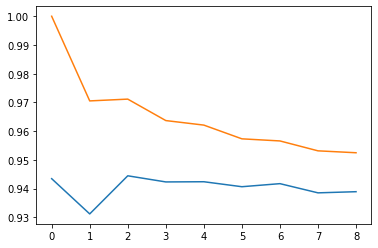

In [149]:
plt.plot(acc_test)
plt.plot(acc_train)
print(f"best score with n = {np.argmax(acc_test)+1}")

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [43]:
seven_indexes = np.where(y_train ==7)[0]
three_indexes = np.where(y_train == 3)[0]

In [44]:
X_new = np.concatenate((X[seven_indexes] , X[three_indexes]) , axis=0)
y_new = np.concatenate((y[seven_indexes] , y[three_indexes]), axis=0)

In [45]:
y_new = y_new.reshape(-1 ,)

In [46]:
X_train_new , X_test_new , y_train_new , y_test_new = train_test_split(X_new , y_new , test_size=0.2)

In [47]:
sv = SVC()
sv.fit(X_train_new,y_train_new)

SVC()

In [30]:
cv = KFold(n_splits=4 , random_state= 1 , shuffle=True)
scores = cross_val_score(sv , X_new , y_new ,scoring='accuracy', cv=cv )
print(f"Mean score on all folds {np.mean(scores):.2f}")

Mean score on all folds 0.97


In [69]:
svms = np.zeros((10,10),dtype=SVC)
accs = []
for i in range(10):
    for j in range(i+1,10):
        if i != j :
            i_indexes = np.where(y_train ==i)[0]
            j_indexes = np.where(y_train == j)[0]
            
            X_new_temp = np.concatenate((X[i_indexes] , X[j_indexes]) , axis=0)
            y_new_temp = np.concatenate((y[i_indexes] , y[j_indexes]), axis=0)
            
            X_train_new_temp , X_test_new_temp , y_train_new_temp , y_test_new_temp = train_test_split(X_new_temp , y_new_temp , test_size=0.2)
            # globals()[f"svm_{i}_{j}"] = SVC().fit(X_train_new_temp , y_train_new_temp)
            sv_temp = SVC().fit(X_train_new_temp, y_train_new_temp)
            
            y_pred_new_temp = sv_temp.predict(X_test_new_temp)
            svms[i][j] = sv_temp
            accs.append(accuracy_score(y_pred_new_temp,y_test_new_temp))    



c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConve

In [71]:
svms

array([[0, SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC()],
       [0, 0, SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC()],
       [0, 0, 0, SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC()],
       [0, 0, 0, 0, SVC(), SVC(), SVC(), SVC(), SVC(), SVC()],
       [0, 0, 0, 0, 0, SVC(), SVC(), SVC(), SVC(), SVC()],
       [0, 0, 0, 0, 0, 0, SVC(), SVC(), SVC(), SVC()],
       [0, 0, 0, 0, 0, 0, 0, SVC(), SVC(), SVC()],
       [0, 0, 0, 0, 0, 0, 0, 0, SVC(), SVC()],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, SVC()],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=object)

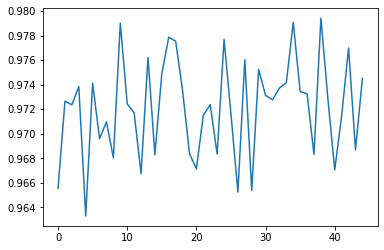

In [74]:
plt.plot(accs)

In [203]:
np.argmin(accs)
# 0 4 is the hardest 

4

In [479]:
i = np.random.randint(1,60000)
x_sample = X[i]
label = y[i]

y_pred = []
for i in range(10):
    for j in range(i+1 ,10):
        if i!=j : 
            y_pred.append(svms[i][j].predict([x_sample]))

y_pred = np.ravel(y_pred)
y_pred = y_pred.astype('int64')
bincount = np.bincount(y_pred)
print(f"predict = {np.argmax(bincount)}")            
print(f"label = {int(label[0])}")

predict = 1
label = 1
